### Decision trees and Random forests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('kyphosis.csv') # medical data with patients spinal condition

In [25]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


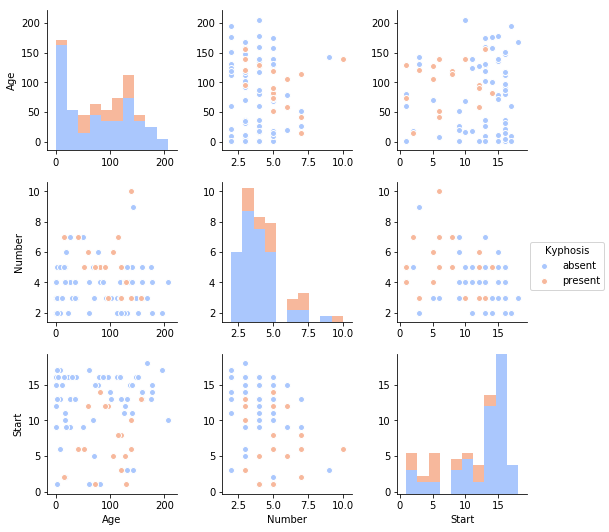

In [29]:
sns.pairplot(df, hue='Kyphosis', palette='coolwarm')

In [9]:
from sklearn.cross_validation import train_test_split

In [30]:
x = df.drop('Kyphosis', axis=1)

In [31]:
y = df['Kyphosis']

In [32]:
from sklearn.cross_validation import train_test_split

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=101) 

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree = DecisionTreeClassifier()

In [36]:
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
predictions = dtree.predict(xtest)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(confusion_matrix(ytest, predictions))
print("-----------------------------------------------------------------------------")
print(classification_report(ytest, predictions))

[[12  5]
 [ 6  2]]
-----------------------------------------------------------------------------
             precision    recall  f1-score   support

     absent       0.67      0.71      0.69        17
    present       0.29      0.25      0.27         8

avg / total       0.54      0.56      0.55        25



In [41]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators=200)

In [46]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
rfc_pred = rfc.predict(xtest)

In [53]:
print(confusion_matrix(ytest, rfc_pred))
print("-----------------------------------------------------------------------------")
print(classification_report(ytest, rfc_pred))

[[17  0]
 [ 6  2]]
-----------------------------------------------------------------------------
             precision    recall  f1-score   support

     absent       0.74      1.00      0.85        17
    present       1.00      0.25      0.40         8

avg / total       0.82      0.76      0.71        25

